In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xnoapi.vn.data import client
from xnoapi.vn.data import stocks

In [51]:
cl = client(r'izIj0Y6dXKvCWhLaZDWa8mnhIycWVL6pa2yISIV0ZobYtdHk1uaj9uaY1aabM3vZZuzIkcU4qGpWijDlcDLnWFklLNMaJIvvRJhieWaInILJZZBcGEhvM9LkLNZIzSTi')

In [52]:
# PHẦN 1: LẤY DỮ LIỆU CỔ PHIẾU CƠ BẢN
# Mã cổ phiếu
symbol = "VCB"

# lấy dữ liệu từ xnoapi
stock_info = stocks.get_stock_info(symbol)
matches = stocks.get_stock_matches(symbol)
top_price = stocks.get_stock_top_price(symbol)
foreign = stocks.get_stock_foreign_trading(symbol)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_info = pd.DataFrame(stock_info)
df_matches = pd.DataFrame(matches)
df_top = pd.DataFrame(top_price)
df_foreign = pd.DataFrame(foreign)

# làm sạch kiểu dữ liệu và ép số
for df in [df_info, df_matches, df_top, df_foreign]:
    df.replace("", None, inplace=True)
    df = df.apply(pd.to_numeric, errors="ignore")

# hiển thị kết quả 
print("THÔNG TIN CƠ BẢN CỦA CỔ PHIẾU", symbol)
print(df_info.T)

print("GIAO DỊCH KHỚP LỆNH GẦN NHẤT")
print(df_matches.head(5))

print("GIÁ TRẦN/SÀN/CAO/THẤP TRONG PHIÊN")
print(df_top.head(5))

print("GIAO DỊCH KHỐI NGOẠI")
df_foreign = df_foreign.fillna("—")
print(df_foreign.to_string(index=False))


THÔNG TIN CƠ BẢN CỦA CỔ PHIẾU VCB
                           0
symbol                   VCB
time    2025-11-07T15:32:25Z
open                      60
high                      60
low                       59
close                   59.3
avg                   59.551
ceil                    64.5
floor                   56.1
prior                   60.3
GIAO DỊCH KHỚP LỆNH GẦN NHẤT
                   time symbol  price  volume side
0  2025-11-07T14:45:08Z    VCB   59.3      20    S
1  2025-11-07T14:45:08Z    VCB   59.3      30    S
2  2025-11-07T14:45:08Z    VCB   59.3      50    S
3  2025-11-07T14:45:08Z    VCB   59.3      10    S
4  2025-11-07T14:45:08Z    VCB   59.3      10    S
GIÁ TRẦN/SÀN/CAO/THẤP TRONG PHIÊN
  symbol source                  time    bp    bq    ap    aq  total_bid  \
0    VCB   None  2025-11-07T14:45:08Z  None  None  None  None          0   

   total_ask  
0          0  
GIAO DỊCH KHỐI NGOẠI
                time symbol  total_room  current_room  buy_vol  sell_vol  

In [61]:
#Phần 2
from vnstock import Vnstock

symbol = "VCB"        
print(f"Đang lấy dữ liệu lịch sử cho {symbol} từ {start_date} đến {end_date}...\n")

# lấy dữ liệu của Vnstock
try:
    stock = Vnstock().stock(symbol=symbol, source='TCBS')     # tạo đối tượng cổ phiếu
    df = stock.quote.history(start='2024-11-07', end='2025-11-07')   # lấy dữ liệu lịch sử giá

    #kiểm tra dữ liệu
    if df.empty:
        print("Dữ liệu rỗng: có thể do mã sai hoặc không có giao dịch trong thời gian này.")
    else:
        print(f"Lấy dữ liệu thành công\n")

        # làm sạch & lọc dữ liệu
        df.dropna(inplace=True)  # loại bỏ dòng trống
        df["volume"] = pd.to_numeric(df["volume"], errors="coerce")  # ép kiểu volume sang số

        # chỉ giữ các dòng có volume > 1 triệu
        df_filtered = df[df["volume"] > 1_000_000]

        #lưu dữ liệu ra file CSV
        output_file = f"du_lieu_{symbol.lower()}_thucte.csv"
        df_filtered.to_csv(output_file, index=False)
        print(f"Dữ liệu đã lưu tại: {output_file}")

        #in phần tóm tắt
        if not df_filtered.empty:
            print("\nTHỐNG KÊ TÓM TẮT:")
            print(f"- Số dòng dữ liệu: {len(df_filtered)}")
            print(f"- Giá cao nhất: {df_filtered['high'].max():,.0f}")
            print(f"- Giá thấp nhất: {df_filtered['low'].min():,.0f}")
            print(f"- Giá đóng trung bình: {df_filtered['close'].mean():,.2f}")

            print("\n Các dòng sau khi xử lý:")
            print(df_filtered)
        else:
            print("Không có dòng nào có volume > 1 triệu.")

except Exception as e:
    print(f"lỗi khi lấy dữ liệu: {e}")


Đang lấy dữ liệu lịch sử cho VCB từ 2025-01-01 đến 2025-11-09...



2025-11-09 12:54:08 - vnstock.common.data.data_explorer - INFO - TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.


Lấy dữ liệu thành công

Dữ liệu đã lưu tại: du_lieu_vcb_thucte.csv

THỐNG KÊ TÓM TẮT:
- Số dòng dữ liệu: 233
- Giá cao nhất: 70
- Giá thấp nhất: 52
- Giá đóng trung bình: 60.84

 Các dòng sau khi xử lý:
          time   open   high    low  close   volume
0   2024-11-07  61.89  62.36  61.89  61.89  1420301
1   2024-11-08  62.09  62.36  61.23  61.23  1381249
2   2024-11-11  61.63  61.63  61.03  61.10  1874368
3   2024-11-12  61.10  61.89  61.03  61.03  1337197
4   2024-11-13  61.03  61.69  61.03  61.43  1332711
..         ...    ...    ...    ...    ...      ...
245 2025-11-03  60.00  60.30  59.30  59.30  2807123
246 2025-11-04  59.20  60.40  59.10  60.10  2960664
247 2025-11-05  60.00  61.10  59.90  60.80  4607422
248 2025-11-06  60.90  61.30  60.20  60.30  2828112
249 2025-11-07  60.00  60.00  59.00  59.30  3594828

[233 rows x 6 columns]


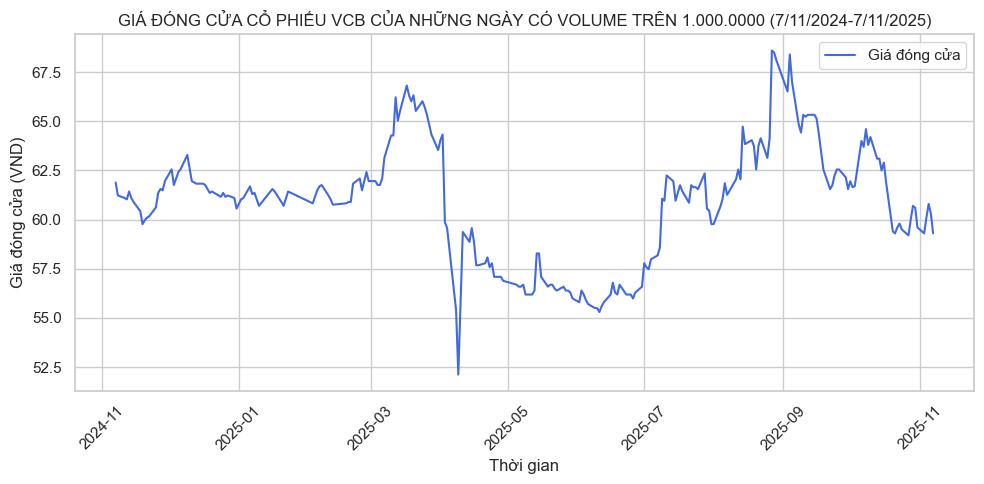

<Figure size 640x480 with 0 Axes>

In [63]:
#Phần 3:
#chuyển cột 'time' hoặc 'date' sang dạng datetime
df_filtered['time'] = pd.to_datetime(df_filtered['time'])

#sắp xếp lại dữ liệu theo thời gian
df_filtered = df_filtered.sort_values('time')

#vẽ biểu đồ
plt.figure(figsize=(10,5))
plt.plot(df_filtered['time'], df_filtered['close'], color='royalblue', label='Giá đóng cửa')
plt.xticks(rotation=45)  # xoay nhãn ngày để dễ đọc
plt.title('GIÁ ĐÓNG CỬA CỔ PHIẾU VCB CỦA NHỮNG NGÀY CÓ VOLUME TRÊN 1.000.0000 (7/11/2024-7/11/2025)')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VND)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#lưu biểu đồ thành file
plt.tight_layout()
plt.savefig("bieu_do_vcb.png")
plt.show()

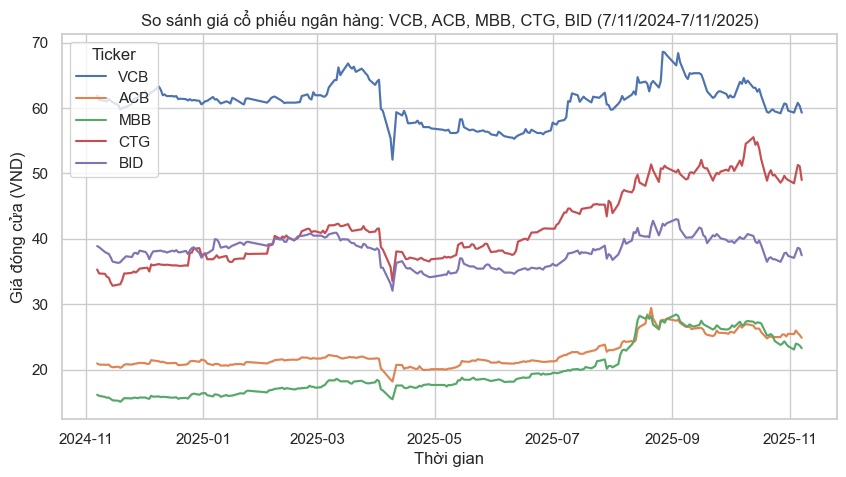

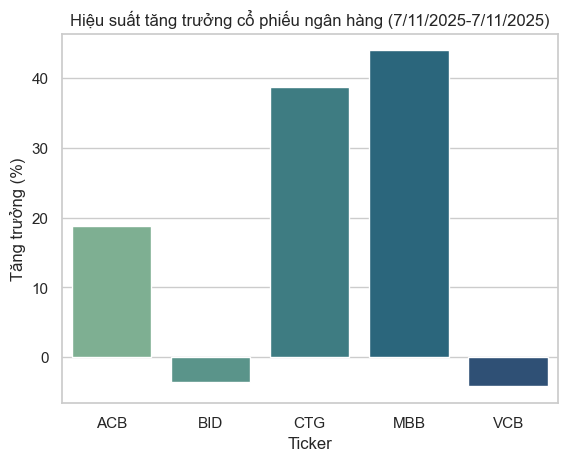

,Ticker,Tăng trưởng (%)
0,ACB,18.741059
1,BID,-3.598972
2,CTG,38.731597
3,MBB,43.915998
4,VCB,-4.184844


In [ ]:
#Phân tích
from vnstock import *
sns.set_theme(style="whitegrid")

tickers = ["VCB", "MBB", "ACB", "CTG","BID"]

for t in tickers:
    df = stock.quote.history(symbol=t, start='2024-11-07', end='2025-11-07')
    df["Ticker"] = t
    dfs.append(df)

data = pd.concat(dfs)

# vẽ biểu đồ giá đóng cửa
plt.figure(figsize=(10,5))
sns.lineplot(data=data, x="time", y="close", hue="Ticker")
plt.title("So sánh giá cổ phiếu ngân hàng: VCB, ACB, MBB, CTG, BID (7/11/2024-7/11/2025)")
plt.xlabel("Thời gian")
plt.ylabel("Giá đóng cửa (VND)")
plt.show()

# Tính hiệu suất tăng trưởng %
perf =(
    data.groupby("Ticker")["close"]
    .apply(lambda x: (x.iloc[-1] / x.iloc[0] - 1) * 100)
    .reset_index()
    .rename(columns={"close": "Tăng trưởng (%)"}))
sns.barplot(data=perf, x="Ticker", y="Tăng trưởng (%)", palette="crest")
plt.title("Hiệu suất tăng trưởng cổ phiếu ngân hàng (7/11/2025-7/11/2025)")
plt.show()

perf